In [1]:
import sys

if "google.colab" in sys.modules:
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
    !python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 603 (delta 131), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (603/603), 199.38 KiB | 6.43 MiB/s, done.
Resolving deltas: 100% (305/305), done.
Installing RAPIDS remaining 25.08 libraries
Using Python 3.12.12 environment at: /usr
Resolved 179 packages in 12.74s
Prepared 41 packages in 44.64s
Uninstalled 31 packages in 1.25s
Installed 41 packages in 575ms
 - bokeh==3.7.3
 + bokeh==3.6.3
 + cucim-cu12==25.8.0
 + cuda-bindings==12.9.4
 + cuda-pathfinder==1.3.1
 - cuda-python==12.6.2.post1
 + cuda-python==12.9.4
 - cudf-cu12==25.6.0 (from https://pypi.nvidia.com/cudf-cu12/cudf_cu12-25.6.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl)
 + cudf-cu12==25.8.0
 + cugraph-cu12==25.8.0
 - cuml-cu12==25.6.0
 + cuml-cu12==25.8.0
 - cuvs-cu12==25.6.1
 + cuvs-cu12==25.8.0
 + c

# scikit-learn t-SNE

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


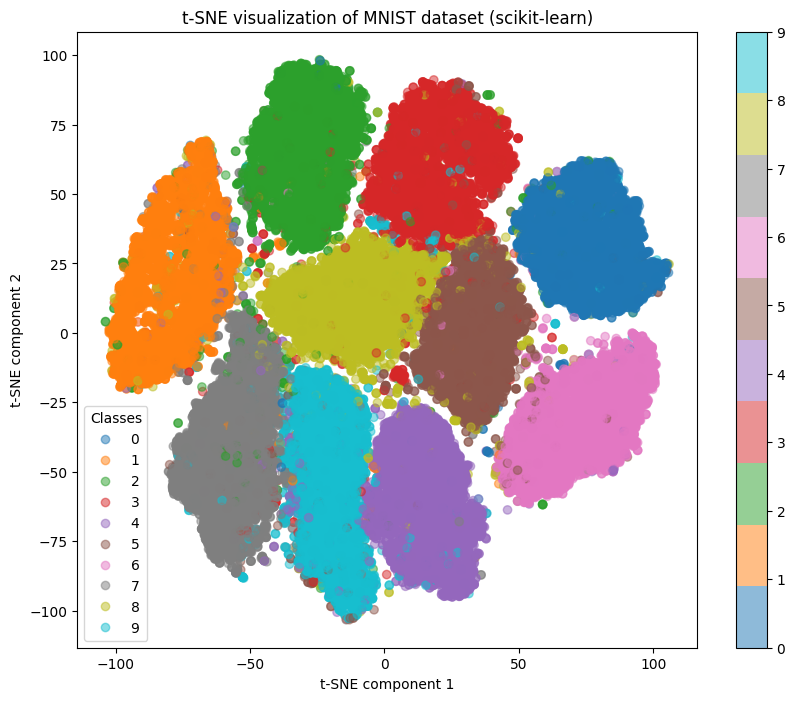

CPU times: user 18min 32s, sys: 25.5 s, total: 18min 57s
Wall time: 19min 9s


In [2]:
%%time

from tensorflow.keras.datasets import mnist

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# MNIST 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터를 1차원 벡터로 변환 (각 이미지가 28x28에서 784로 변환됨)
X_train = X_train.reshape(X_train.shape[0], -1)  # (60,000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)  # (10,000, 784)

# scikit-learn t-SNE 모델 초기화 및 피팅
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 8)) # 그래프 크기 설정
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='tab10', alpha=0.5) # 결과 시각화
plt.title('t-SNE visualization of MNIST dataset (scikit-learn)')
plt.xlabel('t-SNE component 1') # x축 라벨 설정
plt.ylabel('t-SNE component 2') # y축 라벨 설정
plt.legend(*scatter.legend_elements(), title="Classes") # 범주 추가
plt.colorbar(scatter) # 색상 막대 추가
plt.show() # 그래프 출력

# cuML t-SNE

[2025-10-26 12:52:59.083] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


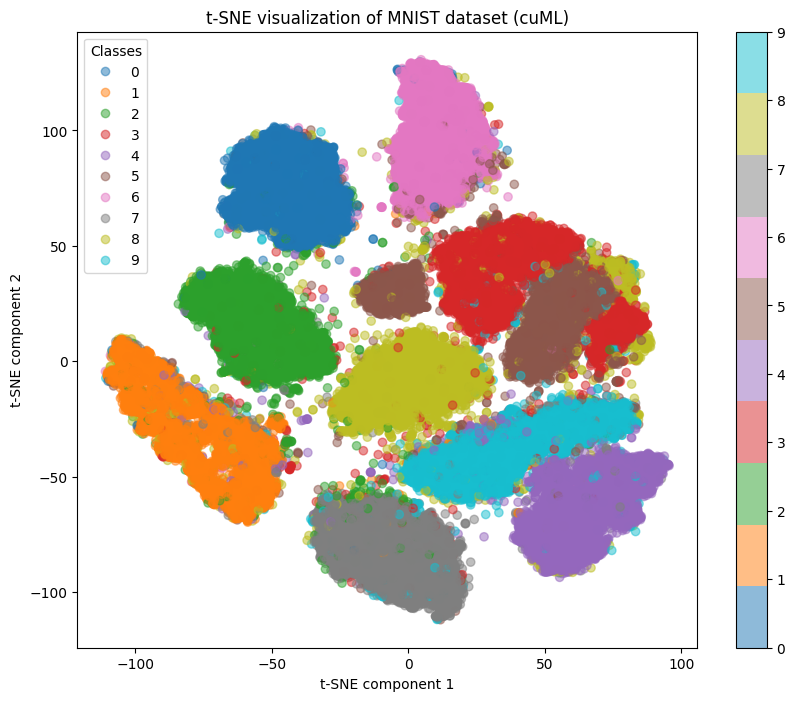

CPU times: user 8.41 s, sys: 1.7 s, total: 10.1 s
Wall time: 16.6 s


In [3]:
%%time

from tensorflow.keras.datasets import mnist

import cudf
import cuml
from cuml.manifold import TSNE
import matplotlib.pyplot as plt


# MNIST 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터를 1차원 벡터로 변환 (각 이미지가 28x28에서 784로 변환됨)
X_train = X_train.reshape(X_train.shape[0], -1)  # (60,000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)  # (10,000, 784)

# cudf DataFrame으로 변환하고 GPU 메모리로 이동
X_train_cudf = cudf.DataFrame(X_train)
y_train_cudf = cudf.Series(y_train)

# cuML t-SNE 모델 초기화 및 피팅
# method='barnes_hut' : scikit-learn과 동일한 method 사용
tsne = TSNE(n_components=2, perplexity=30, method='barnes_hut', random_state=0)
X_tsne_cudf = tsne.fit_transform(X_train_cudf)

# cudf.DataFrame을 numpy 배열로 변환하여 시각화
X_tsne_np = X_tsne_cudf.to_numpy()

plt.figure(figsize=(10, 8)) # 그래프 크기 설정
scatter = plt.scatter(X_tsne_np[:, 0], X_tsne_np[:, 1], c=y_train, cmap='tab10', alpha=0.5) # 결과 시각화
plt.title('t-SNE visualization of MNIST dataset (cuML)')
plt.xlabel('t-SNE component 1') # x축 라벨 설정
plt.ylabel('t-SNE component 2') # y축 라벨 설정
plt.legend(*scatter.legend_elements(), title="Classes") # 범주 추가
plt.colorbar(scatter) # 색상 막대 추가
plt.show() # 그래프 출력